# Data Storytelling

A variable dictionary can be found at https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier

The output variable I am interested in is one's ability to handle an unexpected financial expense. Originally a 5-point ordinal variable, I encoded it as a Boolean variable 'target' that is True if the response was 4 or 5, indicating high confidence in one's ability to handle unexpected expenses. 

In [3]:
#Create dataframe df containing data and 'target' column 
df = pd.read_csv('NFWBS_PUF_2016_data.csv')
#True corresponds to confidence in ability to handle an unexpected financial expense
df['target'] = df['FWB1_1'] > 3

Because there were so many features in this data set (217, to be exact), I decided to use a random forest to act as an initial screen for what variables I would be exploring. I then selected what variables would be interesting to look at regarding their relationship to dealing with unexpected payments and costs.

In [4]:
#Remove columns containing financial well being scores and other irrelevant columns
fwb_cols = [col for col in df if col.startswith('FWB')]
swb_cols = [col for col in df if col.startswith('SWB')]
dfx = df.drop(fwb_cols + swb_cols + ['PUF_ID', 'finalwt', 'FSscore', 'target'], axis=1)

#Use a random forest to identify possible top features
X = dfx.values
y = df['FWB1_1'].values

rfc = RandomForestClassifier()
rfc.fit(X, y)
idx = np.argsort(rfc.feature_importances_)[::-1]
dfx.columns[idx][:15]

Index(['ABSORBSHOCK', 'ENDSMEET', 'SAVINGSRANGES', 'MANAGE1_3', 'SAVEHABIT',
       'GOALCONF', 'ACT1_2', 'FS1_7', 'FS1_2', 'FS1_1', 'CONNECT', 'KHscore',
       'LIFEEXPECT', 'HOUSERANGES', 'FS1_4'],
      dtype='object')

We can see from the output above that some of the variables heavily associated with our target variable are the ability to raise $2,000 in 30 days, the difficulty of covering monthly expenses, the frequency of paying off one's monthly credit card balance, and following through on one's financial intentions.

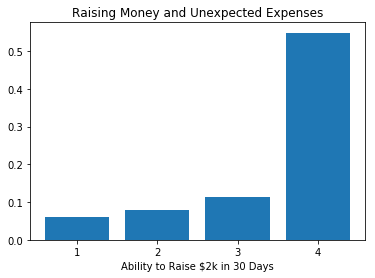

In [56]:
#Remove rows where response was 8 (corresponding to 'I don't know') or -1 (no response)
dfabsorb = df[(df['ABSORBSHOCK'] != 8) & (df['ABSORBSHOCK'] != -1)]

#Create table containing relevant values
absorb_tab = pd.crosstab(dfabsorb['ABSORBSHOCK'], dfabsorb['target'])

#Create x and y values to graph
x_vals = np.arange(4) + 1
absorb_vals = np.empty(4)
for i in range(4):
    absorb_vals[i] = absorb_tab.loc[i+1, True] / np.sum(absorb_tab.iloc[i, 0:2])

#Create bar graph    
plt.bar(x_vals, absorb_vals)
plt.title('Raising Money and Unexpected Expenses')
plt.xlabel('Ability to Raise $2k in 30 Days')
plt.xticks(x_vals)
plt.show()

We can see that certainty in being able to raise $2,000 in 30 days causes a large spike of confidence in the ability to handle an unexpected expense, while certainly not being able to do so up to even probably being able to do so seem to inspire about equal levels of confidence.

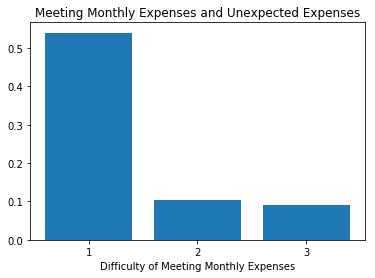

In [59]:
#Remove rows where response was -1 (no response)
dfends = df[df['ENDSMEET'] != -1]

#Create table with relevant values
endsmeet_tab = pd.crosstab(dfends['ENDSMEET'], dfends['target'])

#Create x and y values to graph
x_vals = np.arange(3) + 1
endsmeet_vals = np.empty(3)
for i in range(3):
    endsmeet_vals[i] = endsmeet_tab.loc[i+1, True] / np.sum(endsmeet_tab.iloc[i, 0:2])

#Create bar graph
plt.bar(x_vals, endsmeet_vals)
plt.title('Meeting Monthly Expenses and Unexpected Expenses')
plt.xlabel('Difficulty of Meeting Monthly Expenses')
plt.xticks(x_vals)
plt.show()

As expected, finding it easy to pay off monthly expenses is a huge benefit to dealing with unexpected expenses.

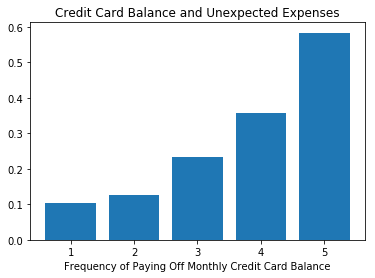

In [60]:
#Remove rows with no response
dfmanage = df[df['MANAGE1_3'] != -1]

#Create table with relevant values
manage_tab = pd.crosstab(dfmanage['MANAGE1_3'], dfmanage['target'])

#Create x and y values to graph
x_vals = np.arange(5) + 1
manage_vals = np.empty(5)
for i in range(5):
    manage_vals[i] = manage_tab.loc[i+1, True] / np.sum(manage_tab.iloc[i, 0:2])

#Create bar graph
plt.bar(x_vals, manage_vals)
plt.title('Credit Card Balance and Unexpected Expenses')
plt.xlabel('Frequency of Paying Off Monthly Credit Card Balance')
plt.xticks(x_vals)
plt.show()

We can see a more gradual effect in paying off one's credit card balance in full every month on one's confidence in their ability to handle unexpected financial expenses.

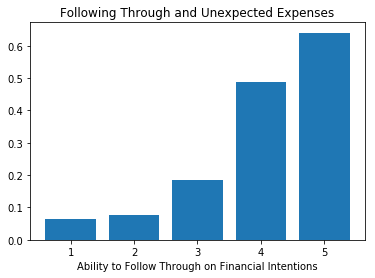

In [61]:
#Remove rows with no response
dfintentions = df[df['FS1_1'] != -1]
intentions_tab = pd.crosstab(dfintentions['FS1_1'], dfintentions['target'])

#Create x and y values to graph
x_vals = np.arange(5) + 1
intentions_vals = np.empty(5)
for i in range(5):
    intentions_vals[i] = intentions_tab.loc[i+1, True] / np.sum(intentions_tab.iloc[i, 0:2])

#Create bar graph
plt.bar(x_vals, intentions_vals)
plt.title('Following Through and Unexpected Expenses')
plt.xlabel('Ability to Follow Through on Financial Intentions')
plt.xticks(x_vals)
plt.show()

People who say they follow through on their financial intentions very well or completely seem to have much more confidence in their ability to handle unexpected expenses than those who have none at all, very little, or only somewhat.